<a href="https://colab.research.google.com/github/rfsampaio/postgraduate_data_science/blob/main/C%C3%B3pia_de_PL_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# Modelo
---





Aqui, criamos um dicionário de têrmos (palavras) sobre a biografia da atriz **Kate Beckinsale**. 

1. A primeira célula obtém o texto da biografia da atriz na variável `texto`. 
2. Na segunda célula cria o dicionário de têrmos com a estrutura:

```
  mydict = { 'word1': qty, 'word2': qty, 'word3': qty, ...}
```

3. A terceira célula apresenta um gráfico de distribuição dos têrmos do seu dicionário para confirmar a lei de Zipf


A sua tarefa pode empregar outros textos de seu interesse, inclusive em inglês e outras línguas de mesmas características (francês, alemão, espanhol etc.), e você também pode querer empregar arquivos locais. Existem inúmeros pré- tratamentos possíveis nos dados e diferentes formas de exibir os dados. Para o pré tratamento você pode incluir outras transformações para melhorar a qualidade do seu dicionário. Para exibição dos dados você pode empregar o mesmo código ou buscar uma outra forma de sua preferência.

## Aquisição dos Dados

In [ ]:
import urllib.request  

texto = []

for line in urllib.request.urlopen('https://rfsampaio.github.io/docs/TheDoorsBiography.txt'): 
    texto.append(line.decode('utf-8'))

for i in range(len(texto)):
    texto[i] = texto[i].lower() # para unicidade
    texto[i] = texto[i].replace('\n','')
    texto[i] = texto[i].replace('.','')
    texto[i] = texto[i].replace(',','')
    texto[i] = texto[i].replace('(','')
    texto[i] = texto[i].replace(')','')
    texto[i] = texto[i].replace('?','')
    texto[i] = texto[i].replace('\'','') # elimina '
    texto[i] = texto[i].replace('\"','') # elimina "
    


# Construção do Dicionário

In [ ]:
mydict = {}                             # crie um dicionário vazio

for line in texto:

  line = line.lower()                   # converte para lower
  words = line.split()                  # separa cada palavra
#  print(words)

  for word in words:                      # para cada palavra em words
    if word not in mydict.keys():         # se palavra não está no dicionário 
      mydict[word] = 1                    # acrescenta a word com o valor 1
    else:                                 # se a entrada já existe 
      mydict[word] =  mydict[word] + 1    # apenas soma 1 ao valor já existente

print(mydict)    

{'the': 209, 'doors': 36, 'biography': 2, 'mark': 1, 'moment': 1, 'when': 6, 'american': 4, 'rock': 9, 'underground': 1, 'of': 73, '1960s': 1, 'came': 3, 'crashing': 1, 'into': 8, 'mainstream': 1, 'groups': 2, 'massive': 1, 'influence': 2, 'on': 34, 'course': 3, 'music': 4, 'may': 2, 'been': 3, 'overshadowed': 1, 'by': 22, 'decades': 2, 'lionization': 1, 'their': 17, 'late': 1, 'lead': 2, 'singer': 6, 'jim': 9, 'morrison': 19, 'whose': 1, 'early': 4, 'death': 4, 'wound': 3, 'up': 8, 'being': 3, 'a': 51, 'pivotal': 2, 'part': 4, 'legacy': 1, 'he': 9, 'seemed': 2, 'to': 37, 'loom': 1, 'larger': 1, 'in': 55, 'his': 8, 'afterlife': 1, 'than': 3, 'did': 2, 'roamed': 1, 'earth': 1, 'posthumous': 1, 'popularity': 3, 'cresting': 1, '80s': 3, 'as': 10, 'returned': 1, 'radio': 2, 'airwaves': 2, 'wake': 3, 'magnum': 1, 'opus': 1, 'end': 5, 'soundtracking': 1, 'moments': 1, 'francis': 2, 'ford': 2, 'coppolas': 2, 'apocalypse': 2, 'now': 2, 'never': 2, 'appeared': 4, 'single': 9, 'but': 7, 'its': 1

# Exibição dos Resultados

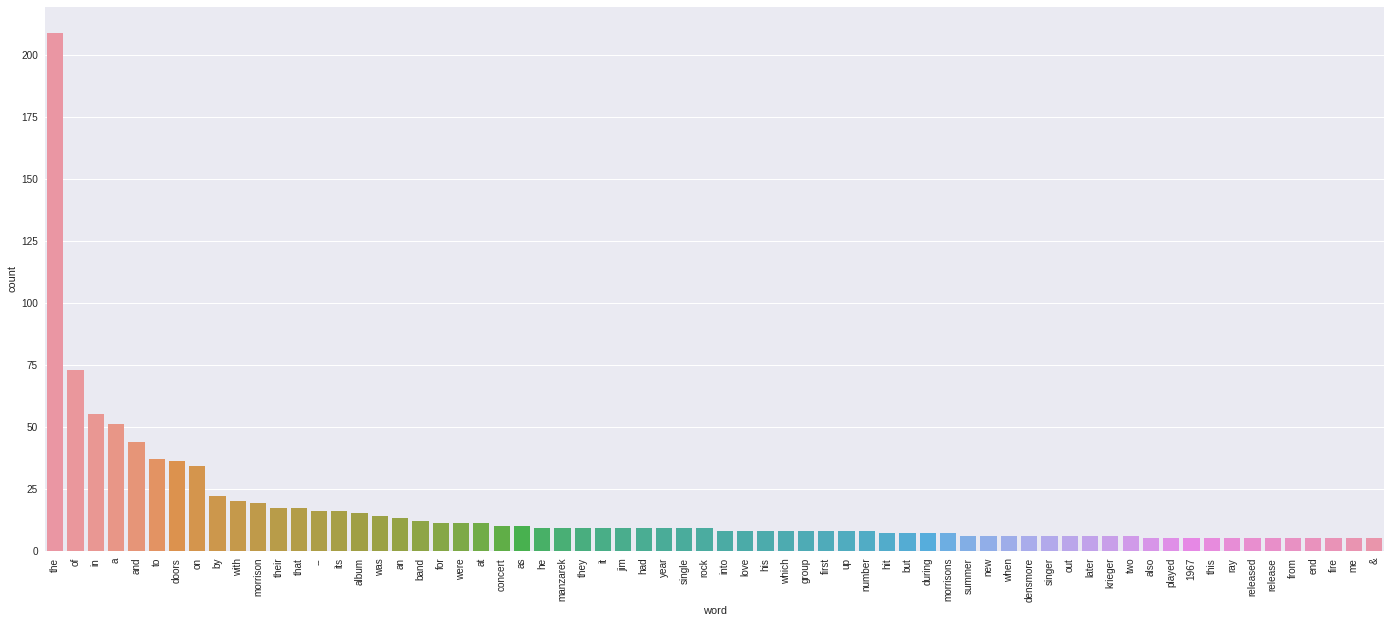

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

df = pd.DataFrame(mydict.items(),  columns=['word', 'count']).sort_values('count',ascending=False)
df = df[df['count'] > 4] # somente termos com mais de 4 ocorrências
# df = df.iloc[ np.int(len(df)/2) - 10 : np.int(len(df)/2) + 10 ] # para livros ou textos com muitos termos limita a um número mínimo de termos

plt.figure(figsize=(24,10))
mpl.style.use(['seaborn'])
sns.barplot(x=df.word,y=df['count'])
plt.xticks(rotation=90) 

plt.show()